In [23]:
import pandas as pd

df = pd.read_csv('loan_applications.csv')
df.info()
columns_to_drop = ['application_id', 'customer_id', 'application_date ']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [24]:
df.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


In [25]:
df.isnull().sum()

application_id                   0
customer_id                      0
application_date                 0
loan_type                        0
loan_amount_requested            0
loan_tenure_months               0
interest_rate_offered            0
purpose_of_loan                  0
employment_status                0
monthly_income                   0
cibil_score                      0
existing_emis_monthly            0
debt_to_income_ratio             0
property_ownership_status        0
residential_address              0
applicant_age                    0
gender                           0
number_of_dependents             0
loan_status                      0
fraud_flag                       0
fraud_type                   48974
dtype: int64

In [26]:
df['loan_status'].value_counts()

loan_status
Approved                   40882
Declined                    8092
Fraudulent - Detected        542
Fraudulent - Undetected      484
Name: count, dtype: int64

In [27]:

mapping = {
    'Approved': 0,
    'Declined':1,
    'Fraudulent - Detected':2,
    'Fraudulent - Undetected':3
}
df['loan_status'] = df['loan_status'].map(mapping)
df['loan_status'].value_counts()

loan_status
0    40882
1     8092
2      542
3      484
Name: count, dtype: int64

In [28]:
df["fraud_type"] = df["fraud_type"].fillna("None")
df['fraud_type'].value_counts()

fraud_type
None                        48974
Synthetic Identity            276
Income Misrepresentation      270
Loan Stacking                 242
Transaction Laundering        238
Name: count, dtype: int64

In [29]:
mapping = {
    'None': 0,
    'Synthetic Identity': 1,
    'Income Misrepresentation': 2,
    'Loan Stacking': 3,
    'Transaction Laundering': 4
}
df['fraud_type'] = df['fraud_type'].map(mapping)
df['fraud_type'].value_counts()

fraud_type
0    48974
1      276
2      270
3      242
4      238
Name: count, dtype: int64

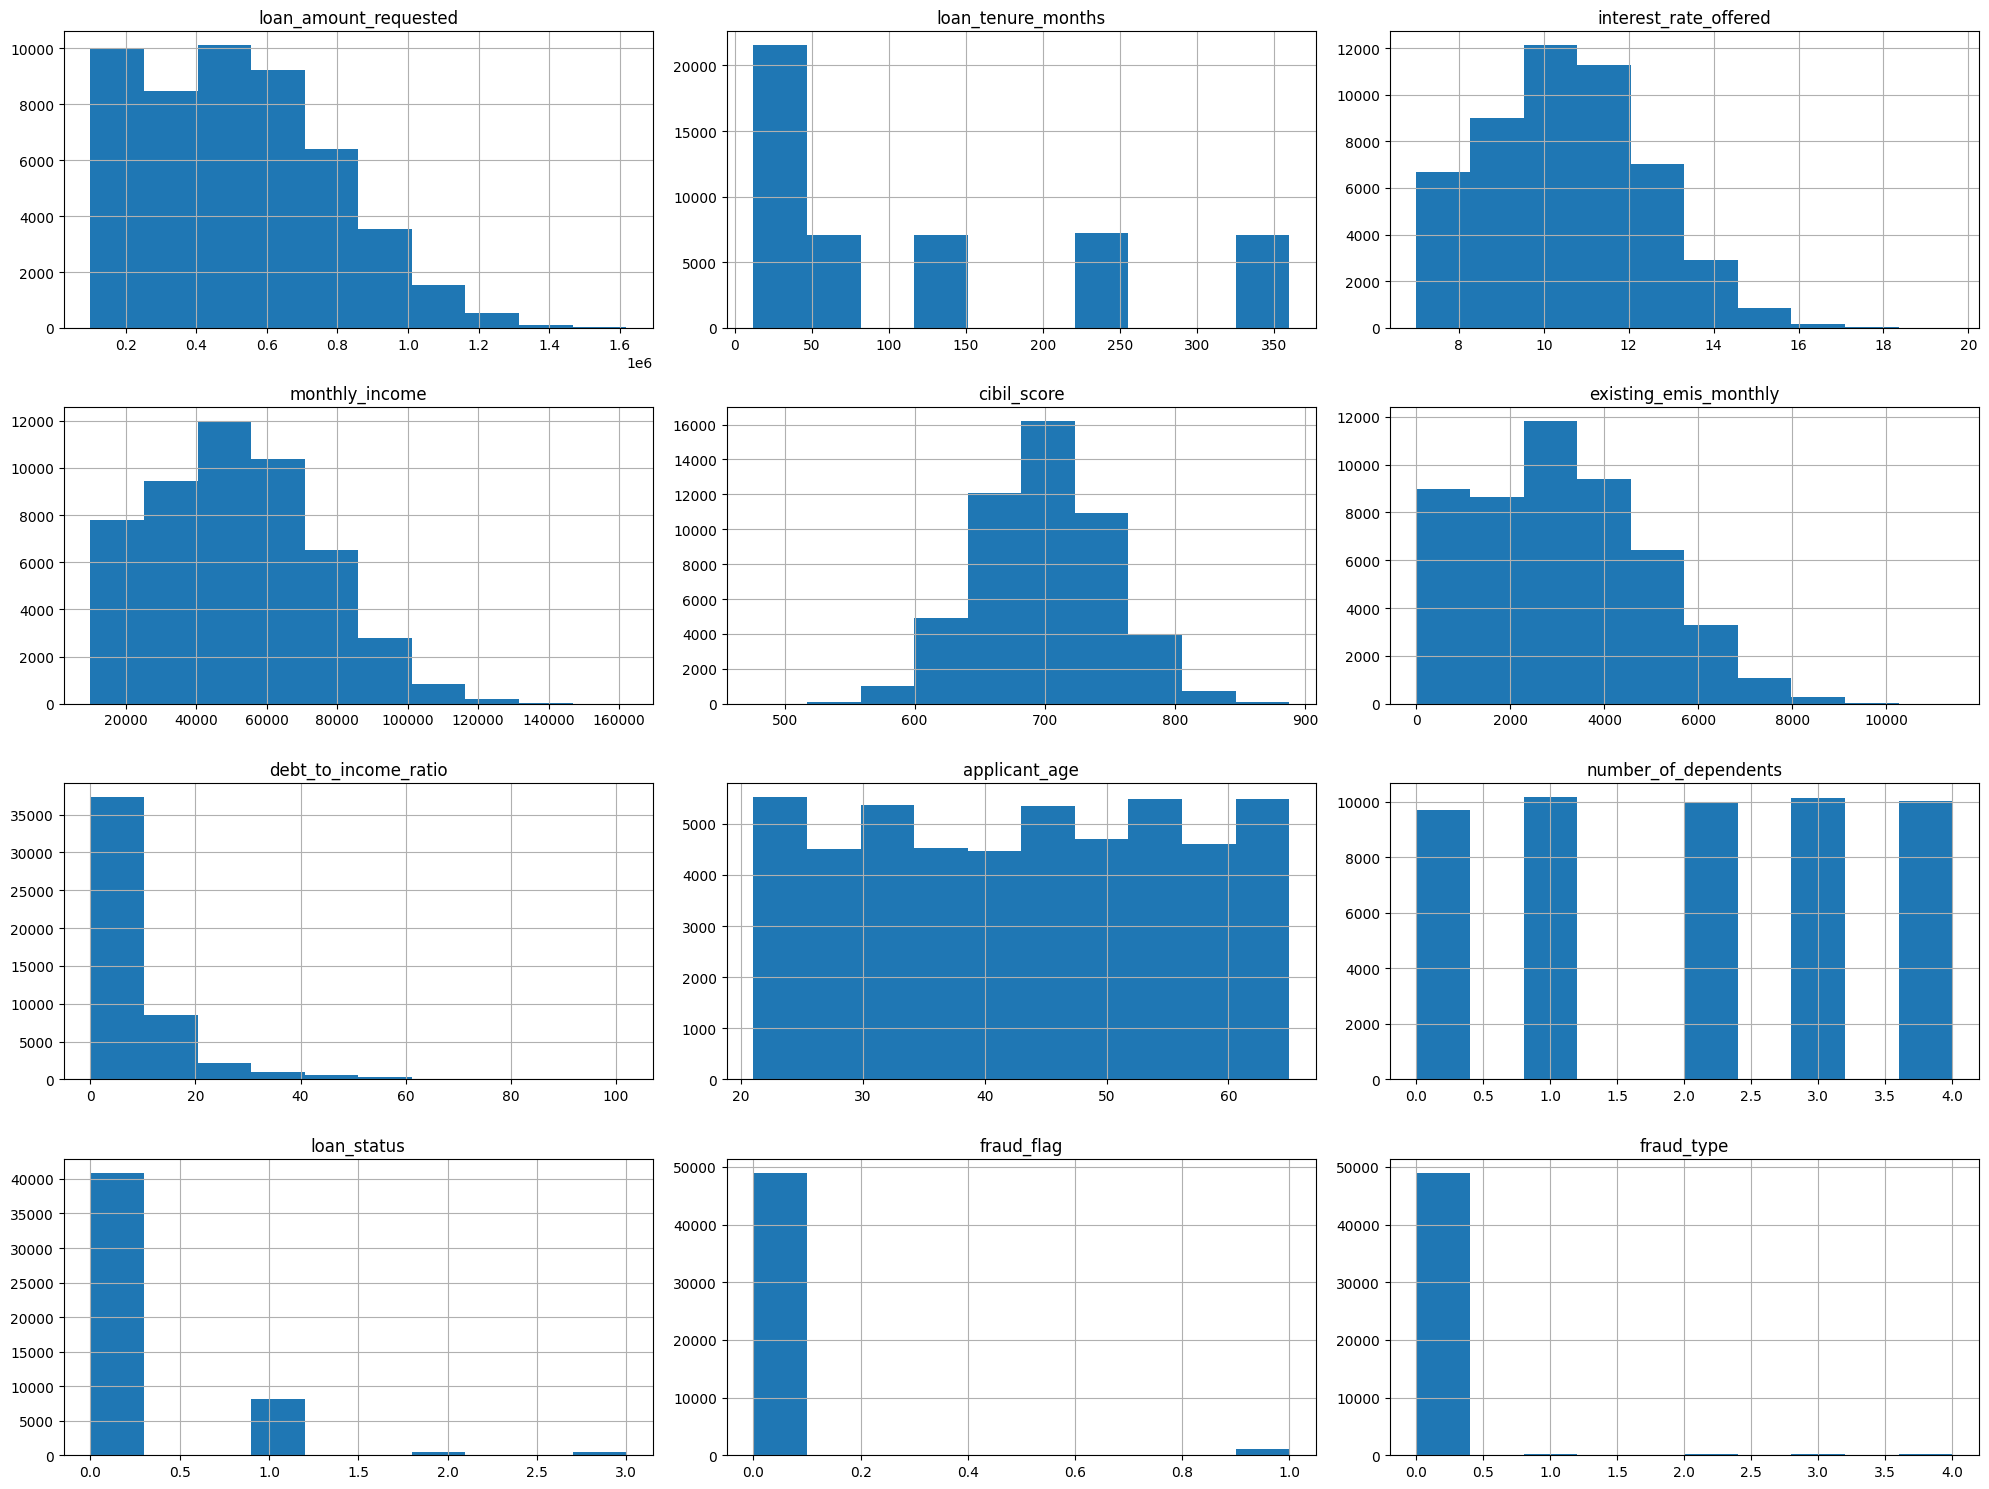

In [30]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [31]:
drop_columns = ['application_id','customer_id','application_date']
df  = df.drop(columns = drop_columns,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_type                  50000 non-null  object 
 1   loan_amount_requested      50000 non-null  float64
 2   loan_tenure_months         50000 non-null  int64  
 3   interest_rate_offered      50000 non-null  float64
 4   purpose_of_loan            50000 non-null  object 
 5   employment_status          50000 non-null  object 
 6   monthly_income             50000 non-null  float64
 7   cibil_score                50000 non-null  int64  
 8   existing_emis_monthly      50000 non-null  float64
 9   debt_to_income_ratio       50000 non-null  float64
 10  property_ownership_status  50000 non-null  object 
 11  residential_address        50000 non-null  object 
 12  applicant_age              50000 non-null  int64  
 13  gender                     50000 non-null  obj

In [32]:
mapping = {
    'Home Loan': 0,
    'Education Loan':1,
    'Personal Loan':2,
    'Business Loan':3,
    'Business Loan':4,
    'Car Loan':5
}
df['loan_type'] = df['loan_type'].map(mapping)

In [33]:
mapping = {
    'Home Renovation':0,
    'Wedding':1,
    'Debt Consolidation':2,
    'Medical Emergency':3,
    'Business Expansion':4,
    'Education':5,
    'Vehicle Purchase':6
}
df['purpose_of_loan'] = df['purpose_of_loan'].map(mapping)

In [34]:
mapping={
    'Retired':0,
    'Salaried':1,
    'Unemployed':2,
    'Business Owner':3,
    'Self-Employed':4,
    'Student':5

}
df['employment_status'] = df['employment_status'].map(mapping)

In [35]:
mapping = {
    'Jointly Owned':0,
    'Rented':1,
    'Owned':2
}
df['property_ownership_status'] = df['property_ownership_status'].map(mapping)

In [36]:
mapping = {
    'Other':0,
    'Female':1,
    'Male':2
}
df['gender']= df['gender'].map(mapping)
df['gender'].value_counts()

gender
0    16913
1    16722
2    16365
Name: count, dtype: int64

In [37]:
df.isna().sum()

loan_type                    0
loan_amount_requested        0
loan_tenure_months           0
interest_rate_offered        0
purpose_of_loan              0
employment_status            0
monthly_income               0
cibil_score                  0
existing_emis_monthly        0
debt_to_income_ratio         0
property_ownership_status    0
residential_address          0
applicant_age                0
gender                       0
number_of_dependents         0
loan_status                  0
fraud_flag                   0
fraud_type                   0
dtype: int64

In [38]:
print(list(df.columns))

['loan_type', 'loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered', 'purpose_of_loan', 'employment_status', 'monthly_income', 'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio', 'property_ownership_status', 'residential_address', 'applicant_age', 'gender', 'number_of_dependents', 'loan_status', 'fraud_flag', 'fraud_type']


In [39]:
from sklearn.preprocessing import StandardScaler

numericScale = ['loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered',
            'monthly_income', 'cibil_score', 'existing_emis_monthly',
            'debt_to_income_ratio', 'applicant_age', 'number_of_dependents']

scaler = StandardScaler()
df[numericScale] = scaler.fit_transform(df[numericScale])


In [40]:

df = df.drop('residential_address', axis=1)
df.head()

,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,4,0.327339,-0.900989,0.587334,3,0,-0.676242,0.297482,-1.036588,-0.563563,1,-1.161198,1,0.701134,0,0,0
1,5,-1.503991,0.976957,1.604763,5,2,0.031626,-0.644028,-1.616465,-0.894200,2,0.072406,0,0.701134,0,0,0
2,1,-0.301272,-0.505632,0.452368,3,4,-1.509767,2.180501,0.808473,2.347503,1,0.997610,0,1.410984,0,0,0
3,5,-0.690066,-0.011436,-0.087492,2,4,-0.923367,-1.044670,0.492177,0.554554,1,-1.238298,0,1.410984,1,0,0
4,2,-1.503991,-0.703311,1.874694,4,1,-0.290894,-1.505409,-1.036588,-0.632402,1,0.535008,0,-1.428418,1,0,0


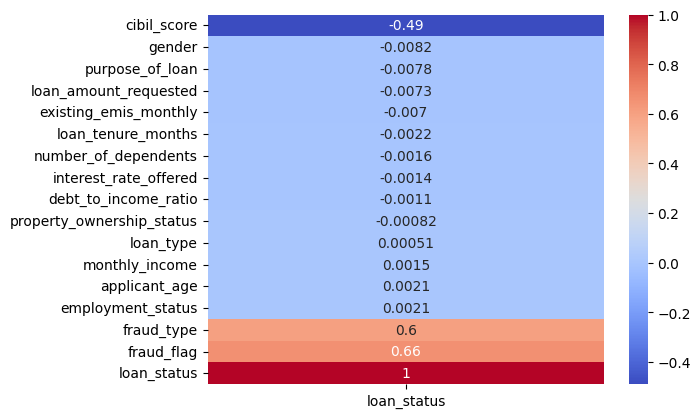

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt
correlation = df.corr()['loan_status']
correlation = df.corr()['loan_status'].sort_values().to_frame()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='fraud_type', ylabel='cibil_score'>

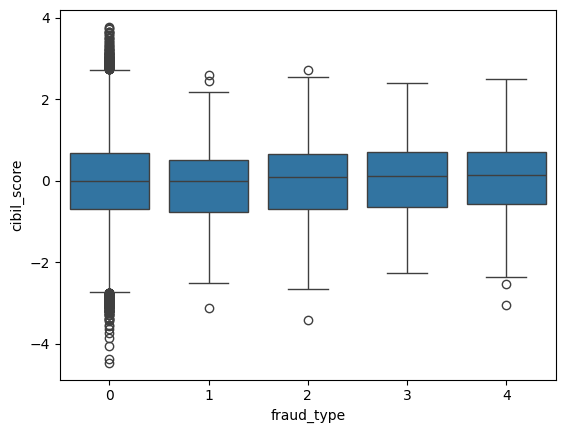

In [42]:
import seaborn as sns
sns.boxplot(x='fraud_type', y='cibil_score', data=df)


In [43]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.1, random_state=42)


In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(trainX, trainY)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
print(model.score(testX, testY))




0.9902


In [46]:
sample = testX.iloc[5:10]
print(model.predict(sample))



[0 0 1 0 0]
